# Benzines
see https://www.kaggle.com/code/phamvanvung/partial-least-squares-regression-in-python

In [ ]:
                                                                                                                                                                                                                               from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import savgol_filter

from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
! git clone https://github.com/IvanMikhailovIMCRAS/Benzines.git

fatal: destination path 'Benzines' already exists and is not an empty directory.


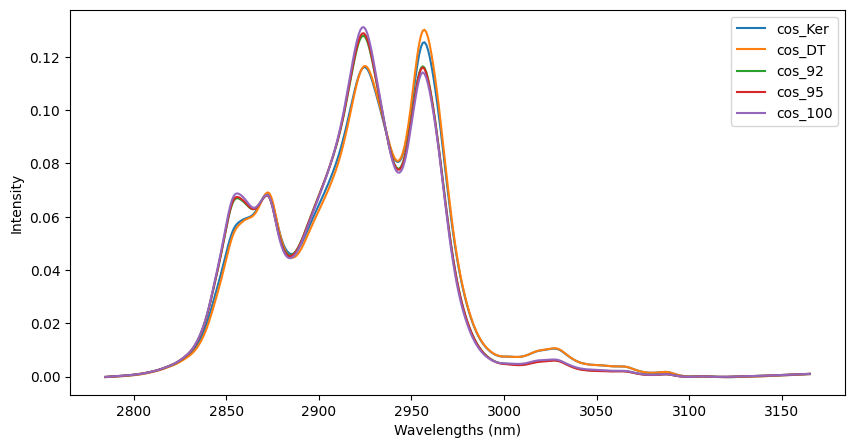

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 加载数据
y = np.loadtxt("Benzines/Answers.txt")  # 假设y数据不直接用于本任务，仅作为示例存在
X = np.loadtxt("Benzines/Spectra.txt")
wl = np.loadtxt("Benzines/Wavenumbers.txt")

# 定义不同类型特征的光谱数据索引
cos_Ker_index = np.where(y[:, 0] == 0)[0]  # 假设第0列为cos_Ker特征
cos_DT_index = np.where(y[:, 1] == 0)[0]  # 假设第1列为cos_DT特征
cos_92_index = np.where(y[:, 2] == 0)[0]  # 假设第2列为cos_92特征
cos_95_index = np.where(y[:, 3] == 0)[0]  # 假设第3列为cos_95特征
cos_100_index = np.where(y[:, 4] == 0)[0]  # 假设第4列为cos_100特征

# 遍历每种类型的光谱数据，将它们的光谱数据分别存储在不同的列表中
cos_Ker_spectra = [X[i] for i in cos_Ker_index]
cos_DT_spectra = [X[i] for i in cos_DT_index]
cos_92_spectra = [X[i] for i in cos_92_index]
cos_95_spectra = [X[i] for i in cos_95_index]
cos_100_spectra = [X[i] for i in cos_100_index]

# 计算每种类型光谱数据的平均值
cos_Ker_mean = np.mean(cos_Ker_spectra, axis=0)
cos_DT_mean = np.mean(cos_DT_spectra, axis=0)
cos_92_mean = np.mean(cos_92_spectra, axis=0)
cos_95_mean = np.mean(cos_95_spectra, axis=0)
cos_100_mean = np.mean(cos_100_spectra, axis=0)

# 绘制每种类型光谱数据的平均值
plt.figure(figsize=(10, 5))
plt.plot(wl, cos_Ker_mean, label='cos_Ker')
plt.plot(wl, cos_DT_mean, label='cos_DT')
plt.plot(wl, cos_92_mean, label='cos_92')
plt.plot(wl, cos_95_mean, label='cos_95')
plt.plot(wl, cos_100_mean, label='cos_100')

plt.xlabel("Wavelengths (nm)")
plt.ylabel("Intensity")
plt.legend()
plt.show()

In [ ]:
y.shape

(976, 5)

In [ ]:
X.shape

(976, 396)

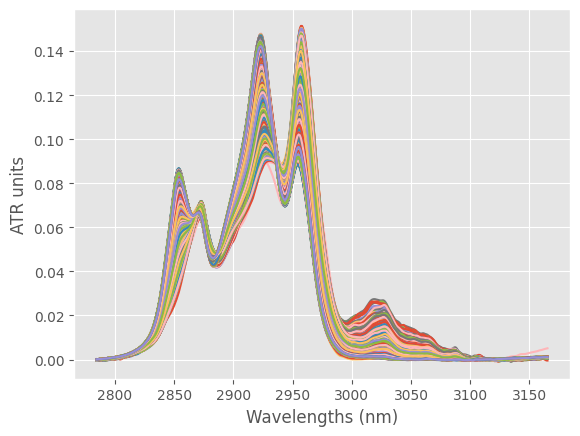

In [ ]:
with plt.style.context('ggplot'):
    plt.plot(wl, X.T)
    plt.xlabel("Wavelengths (nm)")
    plt.ylabel("ATR units")

Spectrum 1 Max Value: 0.1325699973575379 at Wavelength: 2958.00810034644


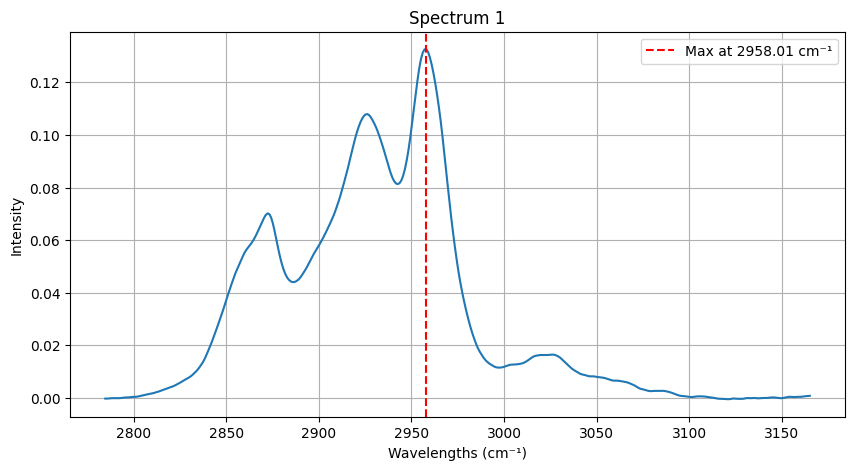

Spectrum 2 Max Value: 0.1431489041073186 at Wavelength: 2957.044007147592


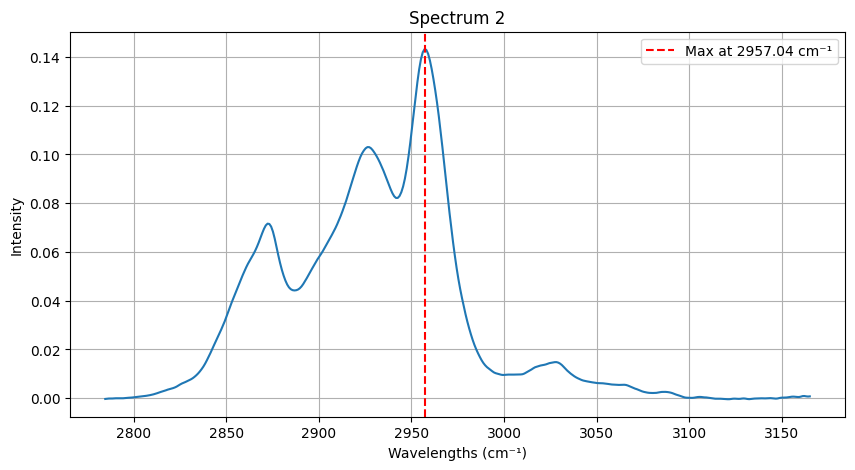

Spectrum 3 Max Value: 0.12704532154493137 at Wavelength: 2958.00810034644


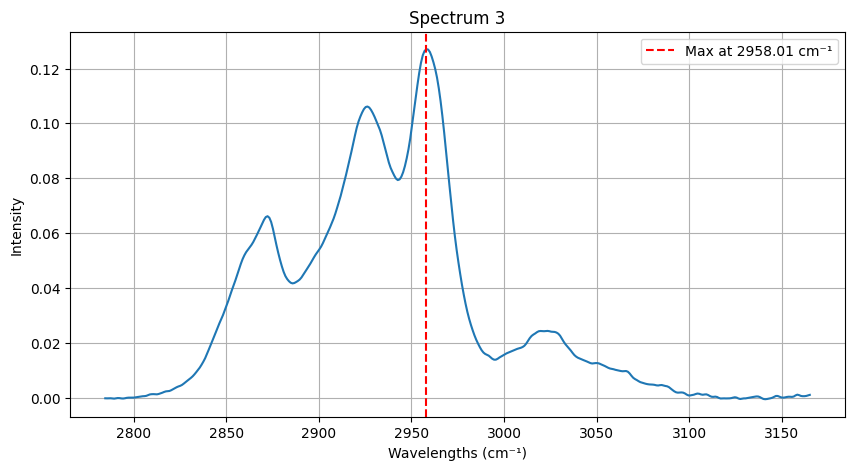

Spectrum 4 Max Value: 0.12273095450800484 at Wavelength: 2958.9721935452885


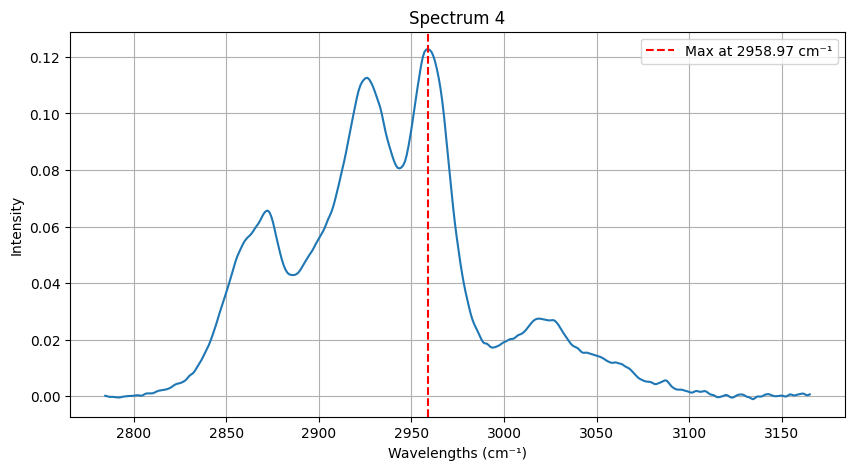

Spectrum 5 Max Value: 0.13357148723625878 at Wavelength: 2957.044007147592


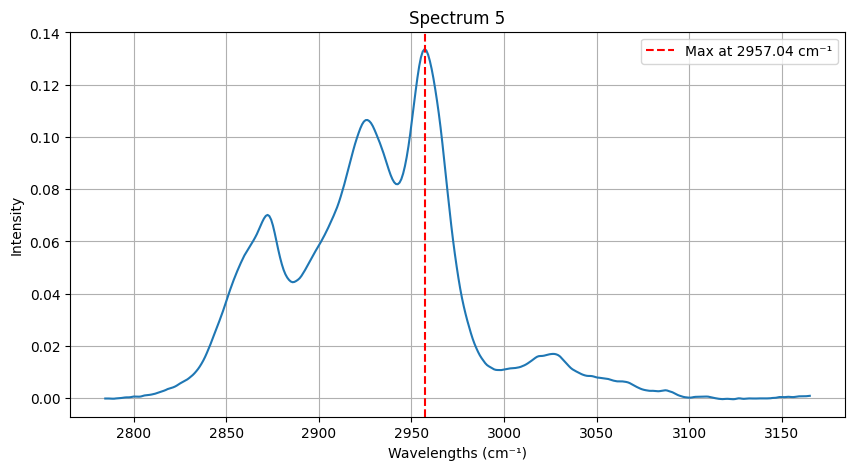

Spectrum 6 Max Value: 0.1428709994724782 at Wavelength: 2957.044007147592


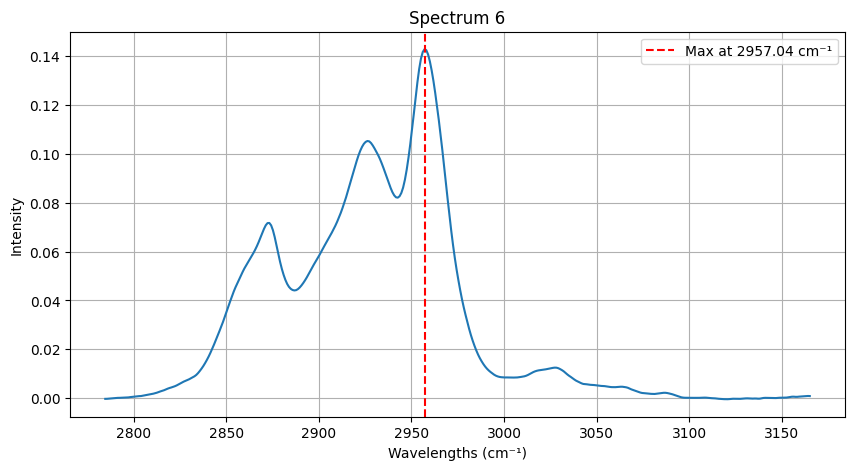

Spectrum 7 Max Value: 0.13551404500175981 at Wavelength: 2957.044007147592


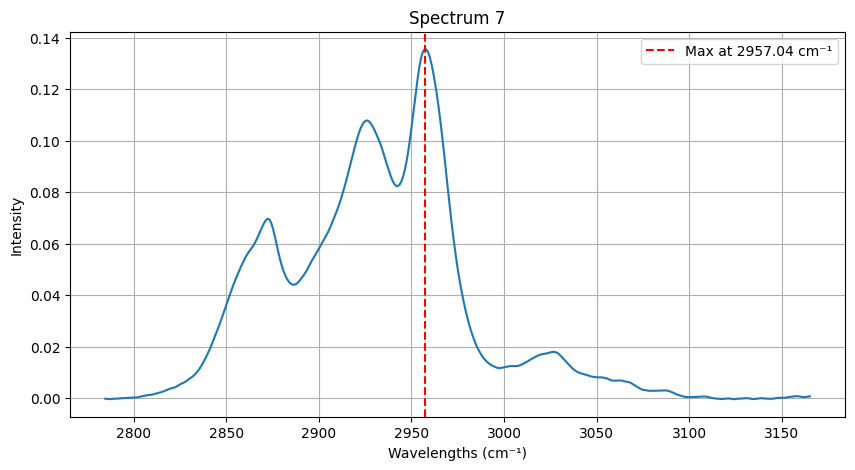

Spectrum 8 Max Value: 0.1395868843219803 at Wavelength: 2957.044007147592


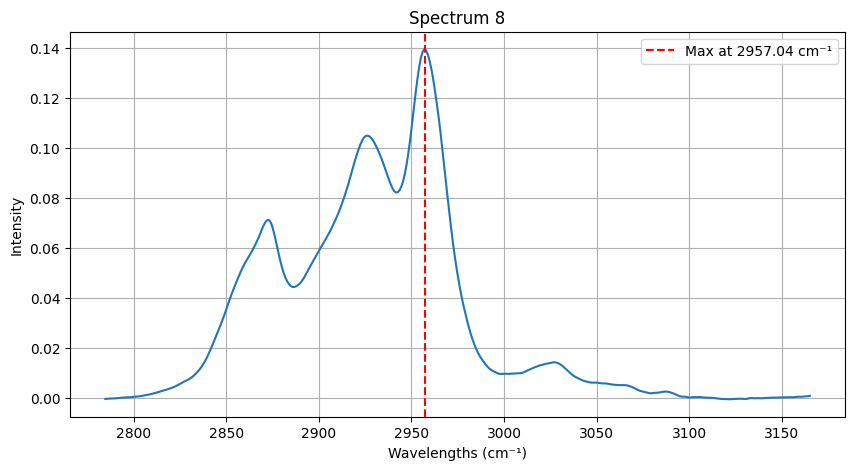

Spectrum 9 Max Value: 0.12684444726498953 at Wavelength: 2958.00810034644


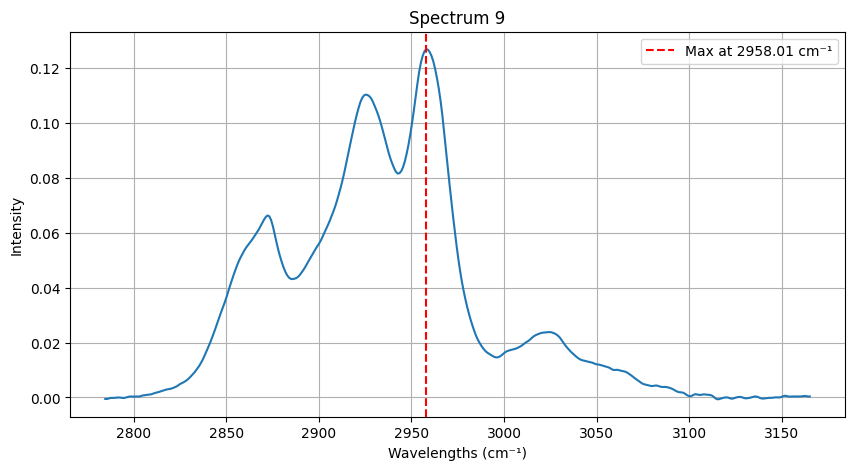

Spectrum 10 Max Value: 0.13855276017686866 at Wavelength: 2957.044007147592


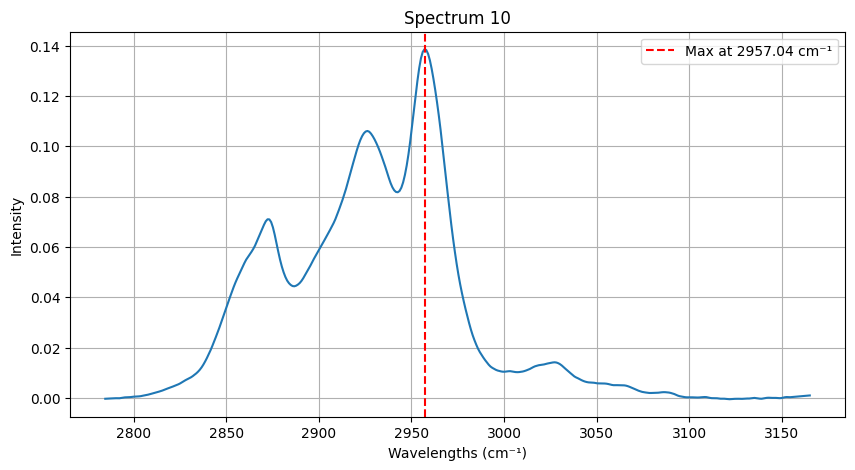

Spectrum 11 Max Value: 0.14004647173467463 at Wavelength: 2957.044007147592


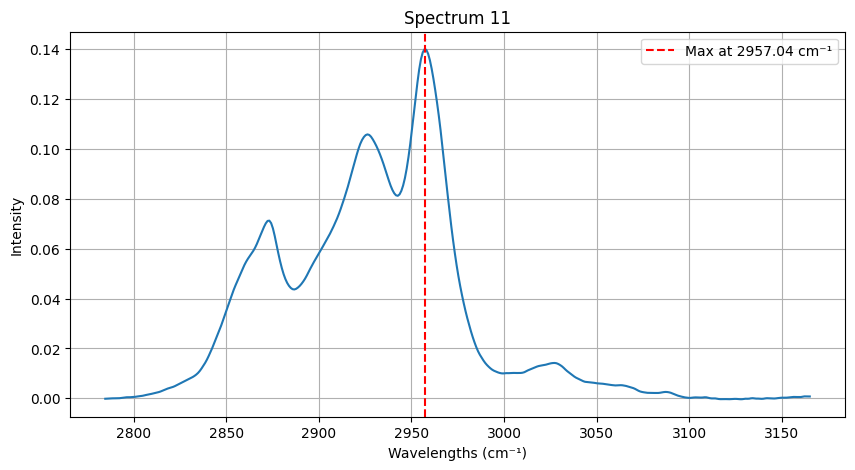

Spectrum 12 Max Value: 0.14250116358484802 at Wavelength: 2957.044007147592


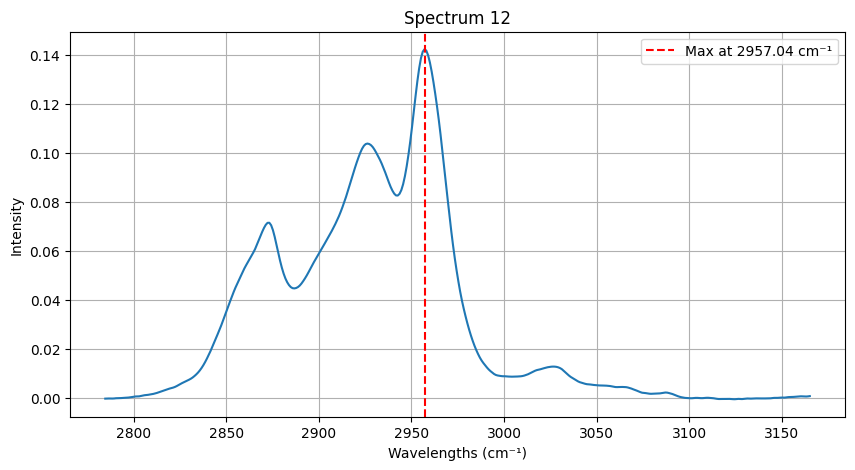

Spectrum 13 Max Value: 0.1413394076504929 at Wavelength: 2957.044007147592


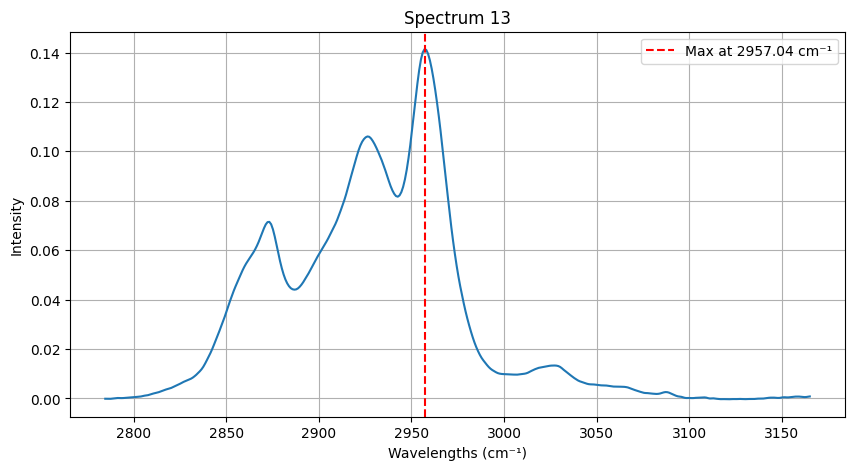

Spectrum 14 Max Value: 0.14203406982761901 at Wavelength: 2957.044007147592


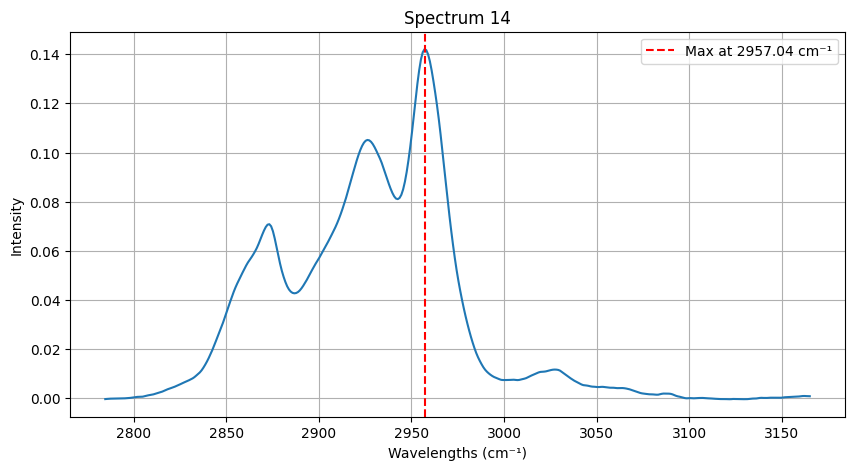

Spectrum 15 Max Value: 0.14302967941146683 at Wavelength: 2957.044007147592


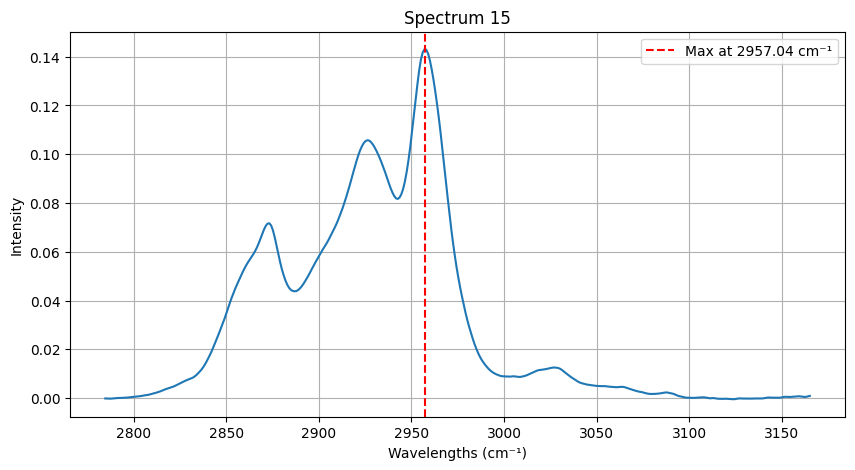

Spectrum 16 Max Value: 0.14281013970217923 at Wavelength: 2957.044007147592


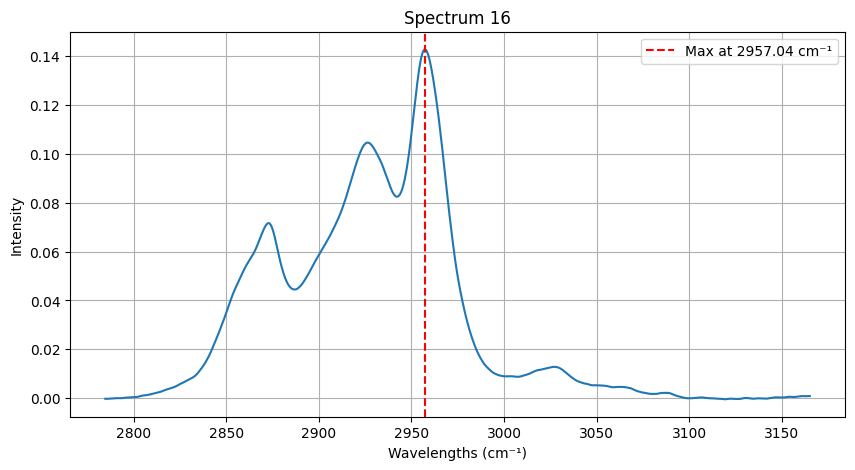

Spectrum 17 Max Value: 0.14091502147661608 at Wavelength: 2957.044007147592


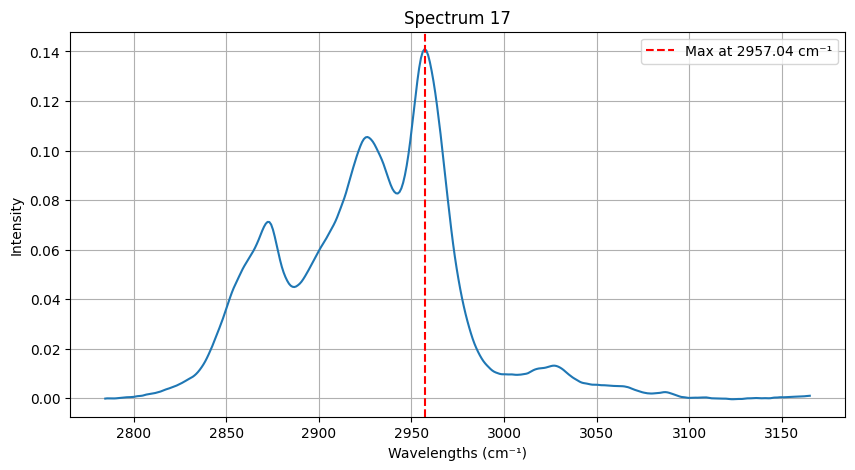

Spectrum 18 Max Value: 0.1429299044317562 at Wavelength: 2958.00810034644


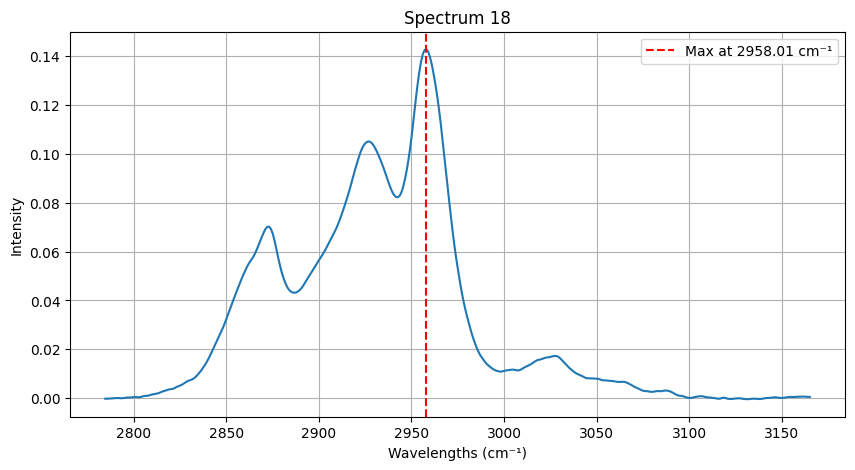

Spectrum 19 Max Value: 0.1315485458059013 at Wavelength: 2957.044007147592


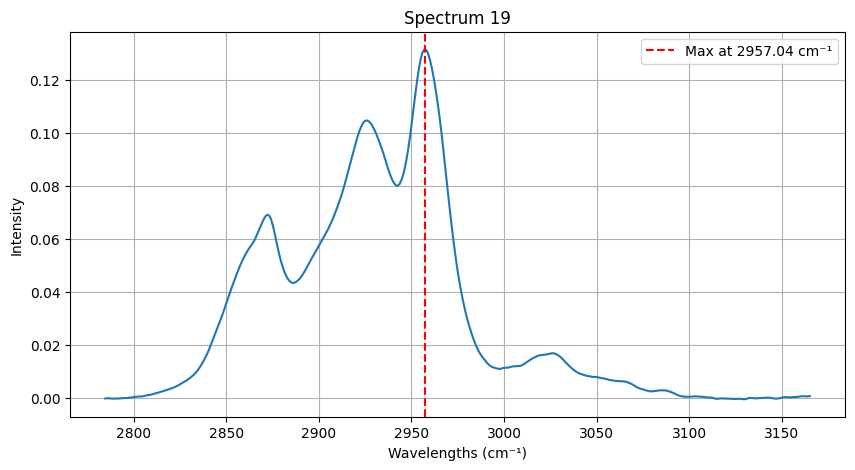

Spectrum 20 Max Value: 0.12775812795147248 at Wavelength: 2958.00810034644


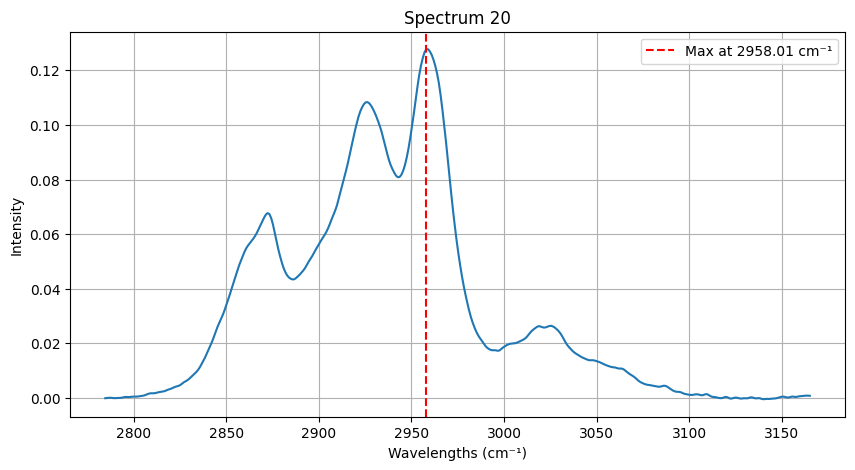

Spectrum 21 Max Value: 0.1414423712524304 at Wavelength: 2957.044007147592


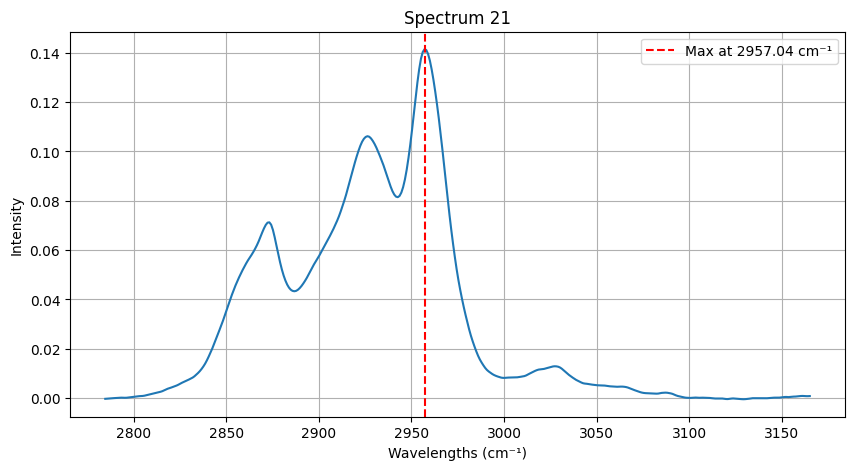

Spectrum 22 Max Value: 0.1330353029582141 at Wavelength: 2957.044007147592


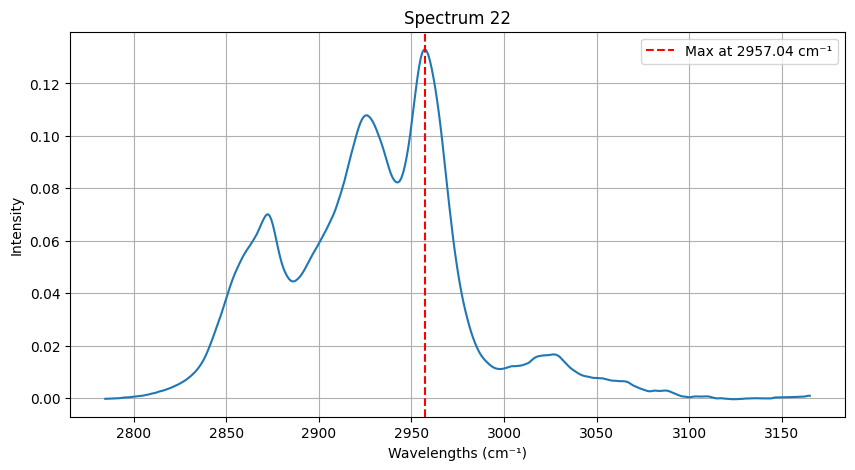

Spectrum 23 Max Value: 0.1378857663714617 at Wavelength: 2958.00810034644


KeyboardInterrupt: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 加载数据
y = np.loadtxt("Benzines/Answers.txt")  # 假设y数据不直接用于本任务，仅作为示例存在
X = np.loadtxt("Benzines/Spectra.txt")
wl = np.loadtxt("Benzines/Wavenumbers.txt")

# 遍历每一个光谱并绘制
for i, spectrum in enumerate(X):
    max_index = np.argmax(spectrum)  # 找到最大值的索引
    max_wavelength = wl[max_index]  # 获取最大值对应的波长
    max_value = spectrum[max_index]  # 最大值

    print(f"Spectrum {i+1} Max Value: {max_value} at Wavelength: {max_wavelength}")

    # 创建独立的图形窗口
    plt.figure(figsize=(10, 5))  # 设置图形大小
    plt.plot(wl, spectrum)
    plt.title(f"Spectrum {i+1}")
    plt.xlabel("Wavelengths (cm⁻¹)")
    plt.ylabel("Intensity")
    plt.axvline(x=max_wavelength, color='r', linestyle='--', label=f'Max at {max_wavelength:.2f} cm⁻¹')
    plt.legend()
    plt.grid(True)
    plt.show()  # 显示图形

# 如果需要批量保存这些图而不是显示，可以使用plt.savefig('spectrum_{i+1}.png')代替plt.show()

In [ ]:
X2 = savgol_filter(X, 17, polyorder=2, deriv=2)

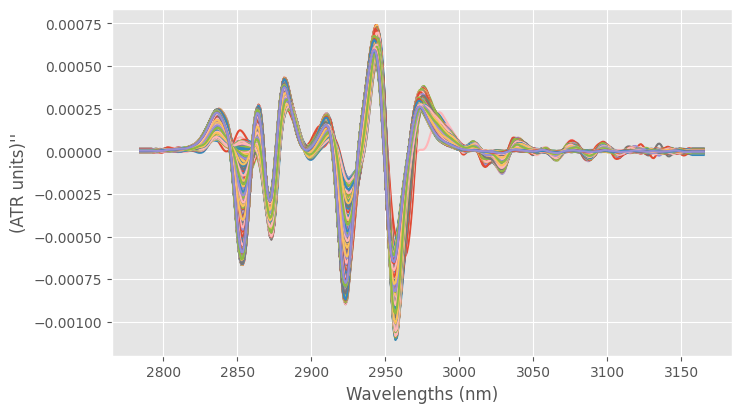

In [ ]:
plt.figure(figsize=(8, 4.5))
with plt.style.context('ggplot'):
    plt.plot(wl, X2.T)
    plt.xlabel("Wavelengths (nm)")
    plt.ylabel("(ATR units)''")
    # plt.plot(wl, X_mean)
    plt.show()

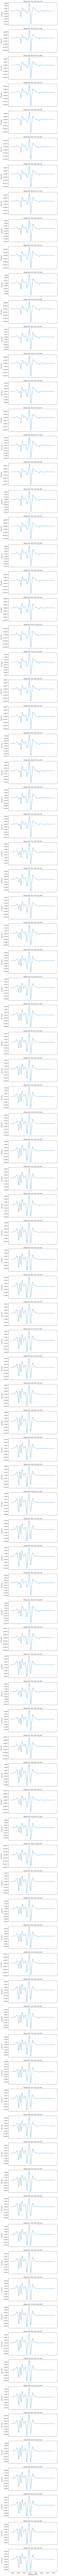

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 假设y数组的形状为(n_samples, n_features)，其中n_samples是样本数量，n_features是特征数量
# X2数组的形状为(n_samples, n_wavelengths)，其中n_wavelengths是波长数量

# 基于y数组中的特征对X2数据进行分组
unique_classes = np.unique(y, axis=0)  # 获取所有独特的特征组合
class_spectra = {tuple(c): [] for c in unique_classes}  # 初始化一个字典来存储每种类型的光谱数据

for i, (spectrum, features) in enumerate(zip(X2, y)):
    class_spectra[tuple(features)].append(spectrum)  # 将光谱数据添加到对应类型的列表中

# 绘制每种类型的光谱曲线
fig, axs = plt.subplots(len(class_spectra), 1, figsize=(8, 4.5*len(class_spectra)), sharex=True)
for i, (class_label, spectra) in enumerate(class_spectra.items()):
    axs[i].plot(wl, np.mean(spectra, axis=0))  # 计算并绘制平均光谱曲线
    axs[i].set_ylabel('ATR units"')
    axs[i].set_title(f'Class {class_label}')

plt.xlabel('Wavelengths (nm)')
plt.show()

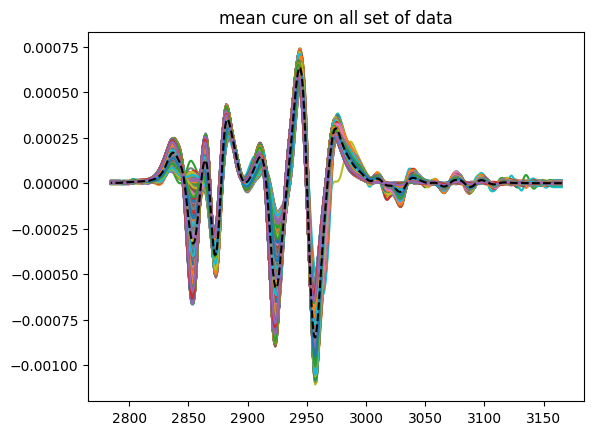

In [ ]:
X_mean = X2[0]
for X in X2[1:]:
    plt.plot(wl, X)
    X_mean += X
X_mean = X_mean / len(X2)
X_mean
plt.plot(wl, X_mean, '--', color='black')
plt.title('mean cure on all set of data')
plt.show()

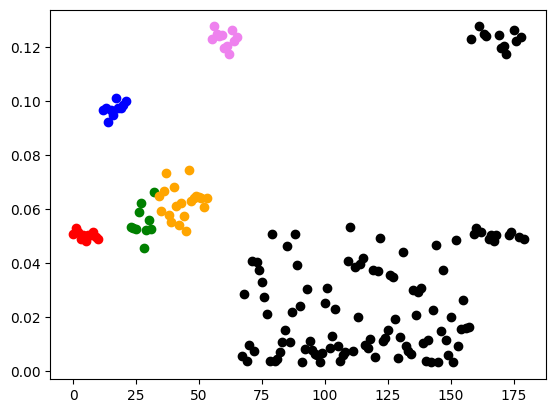

In [ ]:

cos_Ker = []
cos_DT = []
cos_92 = []
cos_95 = []
cos_100 = []
cos_exp = []
for X, comp in zip(X2, y):
    if np.sum(comp * np.array([0., 1., 1., 1., 1.])) == 0.0:
        cos_Ker.append(1 - np.dot(X, X_mean)/(np.linalg.norm(X)*np.linalg.norm(X_mean)))
    if np.sum(comp * np.array([1., 0., 1., 1., 1.])) == 0.0:
        cos_DT.append(1 - np.dot(X, X_mean)/(np.linalg.norm(X)*np.linalg.norm(X_mean)))
    if np.sum(comp * np.array([1., 1., 0., 1., 1.])) == 0.0:
        cos_92.append(1 - np.dot(X, X_mean)/(np.linalg.norm(X)*np.linalg.norm(X_mean)))
    if np.sum(comp * np.array([1., 1., 1., 0., 1.])) == 0.0:
        cos_95.append(1 - np.dot(X, X_mean)/(np.linalg.norm(X)*np.linalg.norm(X_mean)))
    if np.sum(comp * np.array([1., 1., 1., 1., 0.])) == 0.0:
        cos_100.append(1 - np.dot(X, X_mean)/(np.linalg.norm(X)*np.linalg.norm(X_mean)))
    if np.sum(comp * np.array([0., 1., 1., 1., 0.])) == 0.0:
        cos_exp.append(1 - np.dot(X, X_mean)/(np.linalg.norm(X)*np.linalg.norm(X_mean)))
left = 0
right = len(cos_Ker)
plt.plot(list(range(left, right)), cos_Ker, 'o', color='red')
left = right+1
right = left + len(cos_DT)
plt.plot(list(range(left, right)), cos_DT, 'o', color='blue')
left = right+1
right = left + len(cos_92)
plt.plot(list(range(left, right)), cos_92, 'o', color='green')
left = right+1
right = left + len(cos_95)
plt.plot(list(range(left, right)), cos_95, 'o', color='orange')
left = right+1
right = left + len(cos_100)
plt.plot(list(range(left, right)), cos_100, 'o', color='violet')
left = right+1
right = left + len(cos_exp)
plt.plot(list(range(left, right)), cos_exp, 'o', color='black')

plt.show()
